In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.rcParams['figure.facecolor'] = 'white'

# Discussion: Week 3

## Exercise: The Perpetual Inventory Method

The stock of physical capital is a fundamental component of many macroeconomic models but measuring, and therefore acquiring data on, the value of a country's capital stock is hard. The challenge arise because it is hard to estimate the value of something that is not changing ownership in a transaction. What is value of a high-rise apartment building that has had the same owner for 50 years?

One way to overcome this challenge is to use the **perpetual inventory method**. The perpetual inventory method is based on the law of motion of the capital stock:

\begin{align}
K_{t+1} & = I_t + (1-\delta) K_t
\end{align}

where $K_t$ denotes physical capital, $I_t$ denotes investment (purchases of new capital), and $\delta$ denotes the rate of depreciation. Give $K_0$ and data on investment $I_0, I_1, \ldots,$, the the capital stock in periods $1, 2, \ldots$ can be computed iteratively. To obtain $K_0$, the method assumes that the economy is in  a steady state in the initial year. Recall that in the steady state:

\begin{align}
I & = (\delta + n + g) K,
\end{align}

where $n$ is the average rate of population growth and $g$ is the average growth rate of labor efficiency. So, set $K_0 = (\delta + n + g)^{-1} I_0$.

Steps:

1. Obtain real investment data (https://fred.stlouisfed.org/series/GPDICA)
2. Select values for $\delta$, $n$, and $g$.
3. Initialize an array of zeros (or an empty array) to store capital values
4. Set the first value of the captial array equal to the $(\delta + n + g)^{-1} I_0$
5. Iterate over the values in the investment data to compute the remaining values of capital.

The following parameters correspond approximately with long-run averages for the US:

| $$\delta$$ | $$n$$ | $$g$$ |
|------------|-------|-------|
| 0.07       |  0.01 |0.02   |

Read Timothy Kehoe's notes (http://users.econ.umn.edu/~tkehoe/classes/GrowthAccountingNotes.pdf) for more background on the perpetual inventory method if you're interested.

In [2]:
# Import real investment data from FRED into a DataFrame called 'data' (PROVIDED)
data = pd.read_html('https://fred.stlouisfed.org/data/GPDICA',parse_dates=True,index_col=0)[1]

# Set the columns attribute of data to ['Investment']
data.columns = ['Investment']

# Set the index.name attribute of data to 'Date' (i.e., data.index.name)
data.index.name='Date'

# Create a variable called 'delta' that stores the value for delta as 0.1
delta = 0.1

# Create a variable called 'n' that stores the value for n as 0.01
n = 0.01

# Create a variable called 'g' that stores the value for g as 0.02
g = 0.02

# Create a variable called 'capital' equal to an array of zeros with the same length as the variable 'data'
capital = np.zeros(len(data))

# Set the initial value of the 'capital' variable equal to the initial value of investment divided by delta + n + g
capital[0] = data['Investment'].iloc[0]/(delta+n+g)

# Iterate (i.e., use a for loop) over t in range(len(capital)-1) to construct values in the capital array
for t in range(len(capital)-1):
    capital[t+1] = data['Investment'].iloc[t] + (1-delta)*capital[t]
    
# Add a 'Capital' column to data
data['Capital'] = capital

# Divide data by 1000 so that the values are in units are in trillions of $ (instead of billions)
data = data/1000

# Print the first 5 rows of data
print(data.head())

            Investment   Capital
Date                            
1929-01-01    0.125432  0.964862
1930-01-01    0.085428  0.993807
1931-01-01    0.055534  0.979855
1932-01-01    0.020483  0.937403
1933-01-01    0.027705  0.864146


/var/folders/g3/wrmhsrxj2yj6z6db49fb8tyc0000gp/T/ipykernel_74383/140272353.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_html('https://fred.stlouisfed.org/data/GPDICA',parse_dates=True,index_col=0)[1]


Now construct a figure that contains a plot of capital in the top panel and investment in the bottom panel.

1. The figure should have dimensions $12\times 8$.
2. Y-axis labels for investment and capital should both be "trillions of chained dollars"
3. Each axis should have an appropriate title.

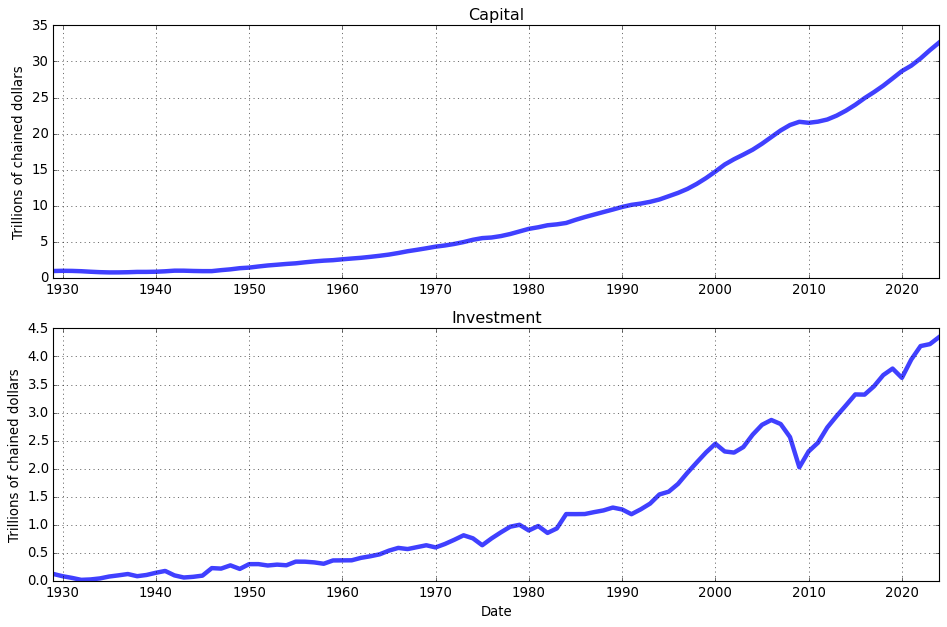

In [3]:
# Create figure
fig = plt.figure(figsize=(12,8))

# Construct the plot of capital
ax1 = fig.add_subplot(2,1,1)
ax1.plot(data.index,data.Capital,lw=4,alpha=0.75)
ax1.set_ylabel('Trillions of chained dollars')
ax1.set_title('Capital')
ax1.grid()

# Construct the plot of investment
ax2 = fig.add_subplot(2,1,2)
ax2.plot(data.index,data.Investment,lw=4,alpha=0.75)
ax2.set_ylabel('Trillions of chained dollars')
ax2.set_xlabel('Date')
ax2.set_title('Investment')
ax2.grid()

# Use fig.tight_layout() to adjust whitespace
fig.tight_layout()

Use the results of the next cell to answer question 2 below.

In [4]:
# Download US population data from FRED (CELL PROVIDED)
pop = pd.read_html('https://fred.stlouisfed.org/data/B230RC0A052NBEA',parse_dates=True,index_col=0)[1]['VALUE']

# Print the most recent population data available
print('As of '+pop.index[-1].month_name()+' '+str(pop.index[-1].year)+', the US population was about '+str(round(pop.iloc[-1]/1000))+' mil. people.')

As of January 2024, the US population was about 340 mil. people.


/var/folders/g3/wrmhsrxj2yj6z6db49fb8tyc0000gp/T/ipykernel_74383/337219235.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pop = pd.read_html('https://fred.stlouisfed.org/data/B230RC0A052NBEA',parse_dates=True,index_col=0)[1]['VALUE']


**Question**

1. Why does the computed capital series fluctuate less than the investment data?
2. Given the population of the US, does the computed value of capital in the last year look large, small, or about right on a per capita basis?

**Answer**

1. Because 10 percent rate of capital accumulation implies an autoregressive coefficent on capital of 0.9 so changes in capital are highly persistent.<!-- answer -->
2. 30 trillion divided by 334 million is about 89,000 which seems to be in the right ballpark. Note that that the amount of capital in the US *per worker* will be an order of magnitude higher since there is a stubstantial share of people not in the workforce: e.g., children, retired persons, institutionalized persons.<!-- answer -->

## Importance of the Initial Capital Value

You might worry that assuming that the US was in a steady state in 1929 is not appropriate and that the assumption will affect all computed values of the capital stock. But the initial value really only affects the computed capital values for the first couple of decades. To see this, let's use the perpetual inventory method to compute the implied capital stock for different intitial capital values that are multiples of the steady state.

In [5]:
# Create array containing desired multiples (CELL PROVIDED)
multiples = np.array([4,2,1.5,1.25,1,2/3,0.5,0.25])

# Create array of initial capital values
initial_ks = multiples*data['Investment'].iloc[0]/(delta+n+g)

# Iterate over initial capital values
for k0 in initial_ks:
    
    # Create a variable called 'capital' equal to an array of zeros with the same length as the variable 'data'
    capital = np.zeros(len(data))
    
    # Set the initial value of the 'capital' variable
    capital[0] = k0
    
    # Iterate (i.e., use a for loop) over t in range(len(capital)-1) to construct values in the capital array
    for t in range(len(capital)-1):
        capital[t+1] = data['Investment'].iloc[t] + (1-delta)*capital[t]
        
    # Add column to data array
    data['K_0='+f'{k0:.2f}'] = capital

Now plot all of the computed paths of capital with different opacity for the lines.

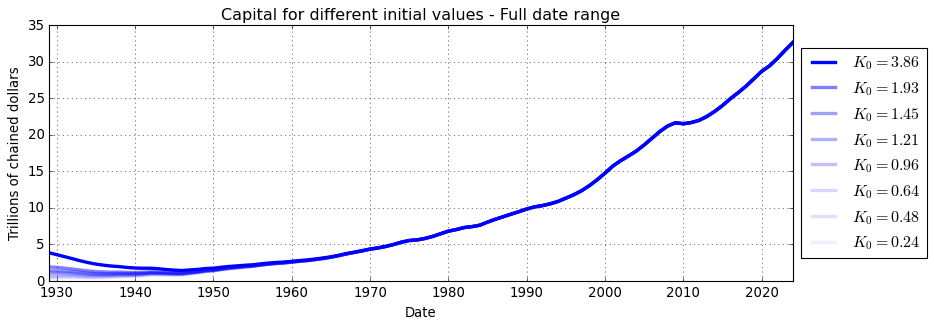

In [6]:
# Plot all computed capital paths (CELL PROVIDED)
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,1,1)

# Iterate over new columns of 'data' DataFrame
for c in data.columns[2:]:
    
    # Plot
    ax.plot(data[c],'b-',lw=3,alpha = float(c.split('=')[1])/np.max(initial_ks.round(2)),label="$"+c+'$')

# Add legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Y-axis label
ax.set_ylabel('Trillions of chained dollars')

# X-axis label
ax.set_xlabel('Date')

# Add grid
ax.grid()

# Add title
ax.set_title('Capital for different initial values - Full date range');

After about 1960, all of the paths seem to converge to a common value. That means that after about 1960, the computed capital data is probably pretty accurate. Now let's focus on the first 20 years:

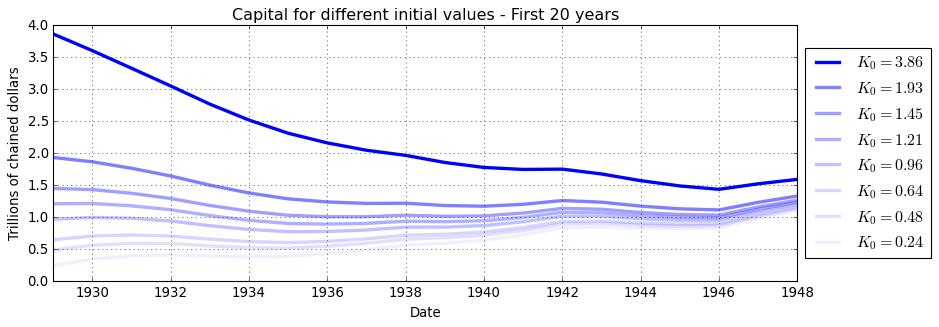

In [7]:
# Plot all computed capital paths (CELL PROVIDED)
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,1,1)

# Iterate over new columns of 'data' DataFrame
for c in data.columns[2:]:
    
    # Plot
    ax.plot(data[c].iloc[:20],'b-',lw=3,alpha = float(c.split('=')[1])/np.max(initial_ks.round(2)),label="$"+c+'$')

# Add legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Y-axis label
ax.set_ylabel('Trillions of chained dollars')

# X-axis label
ax.set_xlabel('Date')

# Add grid
ax.grid()

# Add title
ax.set_title('Capital for different initial values - First 20 years');

Since these dates are close to the starting date, the initial capital value used has the largest consequence here. Therefore if we want an accurate measurement of the capita of the US in the 1920s-30s, we would need to take a different approach.